# Deforestation of the Pacific Temperate Rainforests - Exploratory Data Analysis (Time Series)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Time Series Related Assessments

In [2]:
daily_summaries = pd.read_csv('./data/cleaned_data/central_coast_clean_daily_summary_noaa.csv')

In [3]:
daily_summaries.head()

,DATE,REGION,PRCP,TMAX,TMIN
0,2001-01-01,Bella Coola,7.2,4.2,0.5
1,2001-01-02,Bella Coola,20.0,9.6,1.0
2,2001-01-03,Bella Coola,2.8,6.7,1.0
3,2001-01-04,Bella Coola,18.2,5.8,-1.2
4,2001-01-05,Bella Coola,4.0,6.4,1.0


In [4]:
daily_summaries['DATE'] = pd.to_datetime(daily_summaries['DATE'], format = '%Y/%m/%d', exact = True)
daily_summaries.set_index('DATE', inplace = True)
daily_summaries['TAVG'] = (daily_summaries['TMAX'] + daily_summaries['TMIN']) / 2

In [5]:
daily_summaries.head()

,REGION,PRCP,TMAX,TMIN,TAVG
DATE,,,,,
2001-01-01,Bella Coola,7.2,4.2,0.5,2.35
2001-01-02,Bella Coola,20.0,9.6,1.0,5.30
2001-01-03,Bella Coola,2.8,6.7,1.0,3.85
2001-01-04,Bella Coola,18.2,5.8,-1.2,2.30
2001-01-05,Bella Coola,4.0,6.4,1.0,3.70


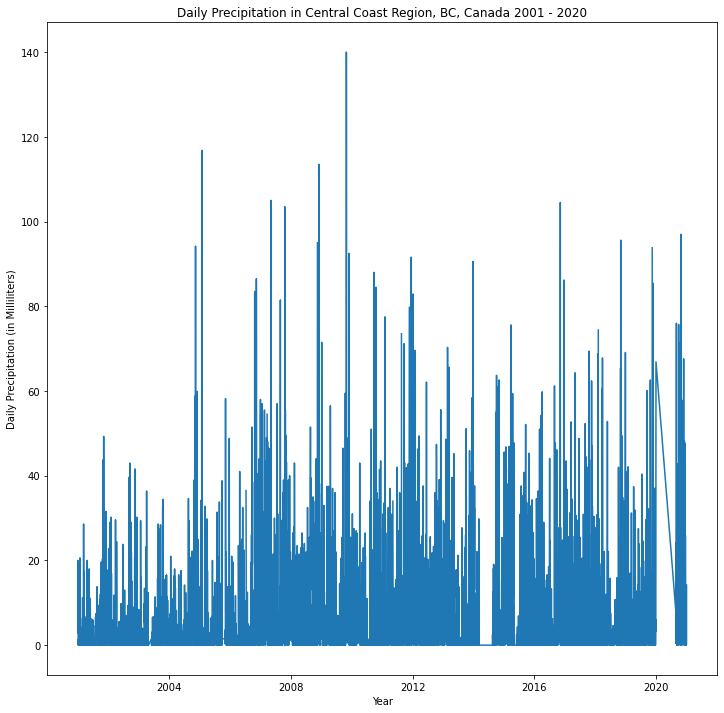

In [6]:
plt.figure(figsize = (12, 12))
plt.plot(daily_summaries.index, daily_summaries['PRCP'])
plt.title('Daily Precipitation in Central Coast Region, BC, Canada 2001 - 2020')
plt.xlabel('Year')
plt.ylabel('Daily Precipitation (in Milliliters)');

In [7]:
daily_summaries['PRCP_lag_365'] = daily_summaries['PRCP'].shift(365)
daily_summaries['TMAX_lag_365'] = daily_summaries['TMAX'].shift(365)
precipitation = daily_summaries[['PRCP', 'PRCP_lag_365']]

In [8]:
precipitation.corr()

,PRCP,PRCP_lag_365
PRCP,1.00000,0.07014
PRCP_lag_365,0.07014,1.00000


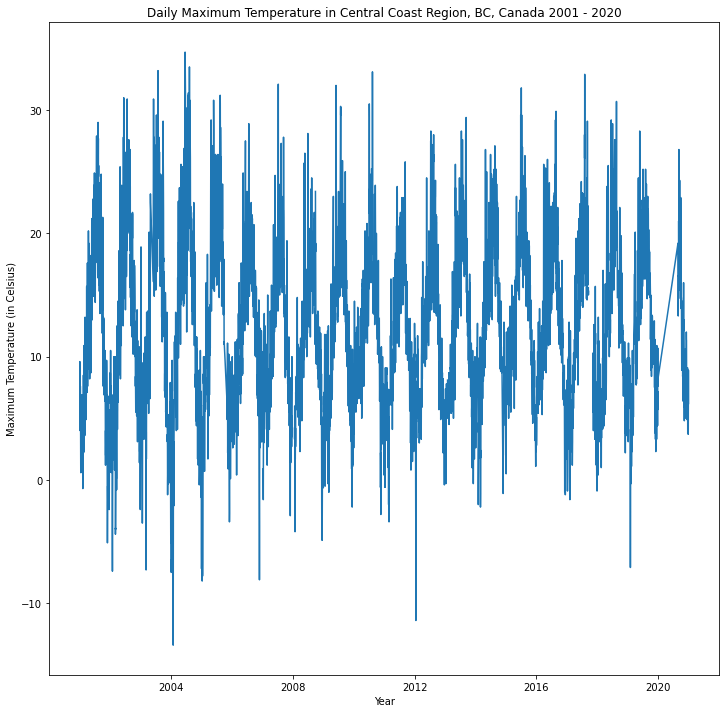

In [9]:
plt.figure(figsize = (12, 12))
plt.plot(daily_summaries.index, daily_summaries['TMAX'])
plt.title('Daily Maximum Temperature in Central Coast Region, BC, Canada 2001 - 2020')
plt.xlabel('Year')
plt.ylabel('Maximum Temperature (in Celsius)');

In [10]:
daily_summaries[daily_summaries['TMAX'] < 0]

,REGION,PRCP,TMAX,TMIN,TAVG,PRCP_lag_365,TMAX_lag_365
DATE,,,,,,,
2001-02-07,Bella Coola,4.2,-0.7,-7.7,-4.20,NaN,NaN
2001-11-26,Bella Coola,5.0,-0.2,-1.2,-0.70,NaN,NaN
2001-11-27,Bella Coola,0.0,-0.1,-1.4,-0.75,NaN,NaN
2001-11-28,Bella Coola,0.0,-1.8,-4.2,-3.00,NaN,NaN
2001-11-29,Bella Coola,0.0,-5.1,-7.1,-6.10,NaN,NaN
...,...,...,...,...,...,...,...
2017-12-28,Bella Bella,15.2,-0.4,-2.1,-1.25,27.3,4.8
2017-12-29,Bella Bella,0.2,-0.7,-4.2,-2.45,0.0,3.0
2017-12-30,Bella Bella,0.0,-0.9,-12.8,-6.85,0.0,3.3


In [11]:
tmax = daily_summaries[['TMAX', 'TMAX_lag_365']]
tmax.corr()

,TMAX,TMAX_lag_365
TMAX,1.00000,0.69558
TMAX_lag_365,0.69558,1.00000


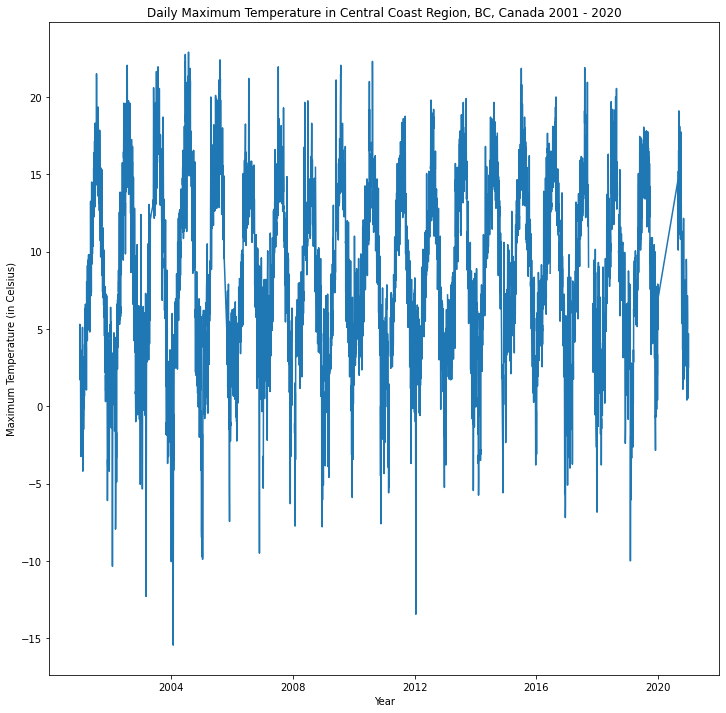

In [12]:
plt.figure(figsize = (12, 12))
plt.plot(daily_summaries.index, daily_summaries['TAVG'])
plt.title('Daily Maximum Temperature in Central Coast Region, BC, Canada 2001 - 2020')
plt.xlabel('Year')
plt.ylabel('Maximum Temperature (in Celsius)');

In [13]:
central_coast = pd.read_csv('./data/cleaned_data/central_coast_clean_summary.csv')

In [14]:
central_coast.head()

,YEAR,PRCP estimate,PRCP above 1400,TMAX,TMAX below 16 C,TMIN,TAVG,TAVG below 16 C,area_tree_cover_jan1,area_tree_cover_loss_Ha,area_burn_Ha,area_tree_cover_dec31,percentage_tree_cover_loss,percentage_tree_cover_loss_over_logging_land,co2_emission_Mg
0,2001,1203.100000,False,29.0,False,2.6,15.80,True,1.603821e+06,1203.934039,145.388563,1.602618e+06,0.000751,0.000751,5.147169e+05
1,2002,1035.135989,False,31.0,False,2.3,16.65,False,1.602618e+06,1298.841284,25.373653,1.601319e+06,0.000810,0.000810,4.873691e+05
2,2003,1192.479042,False,33.2,False,3.4,18.30,False,1.601319e+06,796.634859,100.980558,1.600522e+06,0.000497,0.000497,3.320122e+05
3,2004,1484.433060,True,34.7,False,3.4,19.05,False,1.600522e+06,10855.552080,15065.489648,1.589667e+06,0.006783,0.006783,2.194606e+06
4,2005,1418.691617,True,31.2,False,5.3,18.25,False,1.589667e+06,3906.168671,33.792675,1.585760e+06,0.002457,0.002457,1.283370e+06


In [15]:
central_coast['YEAR'] = pd.to_datetime(central_coast['YEAR'], format = '%Y/%m/%d', exact = True)
central_coast.set_index('YEAR', inplace = True)

In [16]:
central_coast['PRCP estimate lag 1'] = central_coast['PRCP estimate'].shift(1)
central_coast['TMAX lag 1'] = central_coast['TMAX'].shift(1)
central_coast['TMIN lag 1'] = central_coast['TMIN'].shift(1)
central_coast['TAVG lag 1'] = central_coast['TAVG'].shift(1)
central_coast['area_tree_cover_loss_Ha lag 1'] = central_coast['area_tree_cover_loss_Ha'].shift(1)
central_coast['area_burn_Ha lag 1'] = central_coast['area_burn_Ha'].shift(1)
central_coast['percentage_tree_cover_loss lag 1'] = central_coast['percentage_tree_cover_loss'].shift(1)
central_coast['co2_emission_Mg lag 1'] = central_coast['co2_emission_Mg'].shift(1)

In [17]:
central_coast_prcp_est = central_coast[['PRCP estimate lag 1', 'PRCP estimate']]
central_coast_prcp_est.corr()

,PRCP estimate lag 1,PRCP estimate
PRCP estimate lag 1,1.000000,0.536377
PRCP estimate,0.536377,1.000000


In [18]:
central_coast_tmax = central_coast[['TMAX lag 1', 'TMAX']]
central_coast_tmax.corr()

,TMAX lag 1,TMAX
TMAX lag 1,1.000000,0.319951
TMAX,0.319951,1.000000


In [19]:
central_coast_tmin = central_coast[['TMIN lag 1', 'TMIN']]
central_coast_tmin.corr()

,TMIN lag 1,TMIN
TMIN lag 1,1.000000,0.054018
TMIN,0.054018,1.000000


In [20]:
central_coast_tavg = central_coast[['TAVG lag 1', 'TAVG']]
central_coast_tavg.corr()

,TAVG lag 1,TAVG
TAVG lag 1,1.0000,0.1967
TAVG,0.1967,1.0000


In [21]:
central_coast_tree_cover_loss = central_coast[['area_tree_cover_loss_Ha lag 1', 'area_tree_cover_loss_Ha']]
central_coast_tree_cover_loss.corr()

,area_tree_cover_loss_Ha lag 1,area_tree_cover_loss_Ha
area_tree_cover_loss_Ha lag 1,1.000000,-0.010537
area_tree_cover_loss_Ha,-0.010537,1.000000


In [22]:
central_coast_area_burn = central_coast[['area_burn_Ha lag 1', 'area_burn_Ha']]
central_coast_area_burn.corr()

,area_burn_Ha lag 1,area_burn_Ha
area_burn_Ha lag 1,1.000000,-0.059903
area_burn_Ha,-0.059903,1.000000


In [23]:
central_coast_percentage_tree_cover_loss = central_coast[['percentage_tree_cover_loss lag 1', 'percentage_tree_cover_loss']]
central_coast_percentage_tree_cover_loss.corr()

,percentage_tree_cover_loss lag 1,percentage_tree_cover_loss
percentage_tree_cover_loss lag 1,1.000000,-0.010895
percentage_tree_cover_loss,-0.010895,1.000000


In [24]:
central_coast_co2 = central_coast[['co2_emission_Mg lag 1', 'co2_emission_Mg']]
central_coast_co2.corr()

,co2_emission_Mg lag 1,co2_emission_Mg
co2_emission_Mg lag 1,1.000000,0.109899
co2_emission_Mg,0.109899,1.000000


Autocorrelation for 1 year span

|Parameter|Autocorrelation Coefficient|
|---|---|
|Annual Precipitation|0.5364|
|Annual Maximum Temperature|0.3200|
|Annual Minimum Temperature|0.054018|
|Annual Average Temperature|0.1967|
|Annual Area of Tree Cover Loss|-0.01054|
|Annual Area of Burnt Tree Cover|-0.059903|
|Annual Percentage Area of Tree Cover Loss|-0.010895|
|Annual CO2 emission|0.109899|
